# Biclustering applying discretization

In [60]:
%matplotlib inline
import pandas as pd
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import binned_statistic

## 1. Data preprocessing

In [22]:
data = pd.read_csv("TestData/SimulatedDataCoherence/BiclusterA_high.csv", header = None)

In [23]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.82956,-0.54831,0.009606,0.54954,0.64886,0.090355,0.65218,0.12476,0.91613,0.90735,-0.370470
1,0.15286,-0.53179,0.012793,0.46622,0.71576,-0.874990,-0.23763,0.37047,-0.83904,-0.98532,0.175840
2,-0.31950,-0.46583,-0.012242,0.47949,-0.43445,0.070250,-0.22041,-0.15626,-0.17891,0.62023,-0.648240
3,0.18276,-0.49303,-0.032042,0.46603,-0.11152,0.295060,-0.40524,-0.60485,-0.13659,0.21066,0.012703
4,0.96534,-0.49391,0.024100,0.45677,-0.13357,0.062244,-0.92875,0.56100,-0.13701,-0.29148,-0.643040


### 1.1 Difference between points

In [24]:
data_diff = data.iloc[:,0] - data.iloc[:,1]

In [25]:
diff_cols_list = list()
for i in range(1,len(data.columns)):
    diff_col = data.iloc[:,i-1] - data.iloc[:,i]
    diff_cols_list.append(diff_col)

In [26]:
diff_data = pd.DataFrame(diff_cols_list).T

In [27]:
diff_data.head()

,0,1,2,3,4,5,6,7,8,9
0,1.37787,-0.557916,-0.539934,-0.09932,0.558505,-0.561825,0.52742,-0.79137,0.00878,1.277820
1,0.68465,-0.544583,-0.453427,-0.24954,1.590750,-0.637360,-0.60810,1.20951,0.14628,-1.161160
2,0.14633,-0.453588,-0.491732,0.91394,-0.504700,0.290660,-0.06415,0.02265,-0.79914,1.268470
3,0.67579,-0.460988,-0.498072,0.57755,-0.406580,0.700300,0.19961,-0.46826,-0.34725,0.197957
4,1.45925,-0.518010,-0.432670,0.59034,-0.195814,0.990994,-1.48975,0.69801,0.15447,0.351560


/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


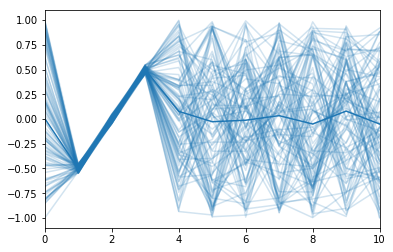

In [33]:
sns.tsplot(data = np.array(data),err_style="unit_traces")

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


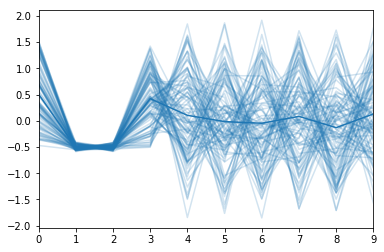

In [32]:
sns.tsplot(data = np.array(diff_data),err_style="unit_traces")

### 1.2 Discretizing data

In [65]:
bins = np.linspace(-2, 2, 10)

In [66]:
bins

array([-2.        , -1.55555556, -1.11111111, -0.66666667, -0.22222222,
        0.22222222,  0.66666667,  1.11111111,  1.55555556,  2.        ])

In [67]:
digitized = np.digitize(diff_data, bins)

In [69]:
bin_means = [diff_data[digitized == i].mean() for i in range(1, len(bins))]